# Wrap-up numpy arrays

## Concatenating arrays in multiple dimensions
Let's take two 2D arrays:

In [1]:
import numpy as np

arr1 = np.arange(15).reshape(5,3)
arr2 = arr1 * 10
print(arr1)
print(arr2)
print(arr1.shape, arr2.shape)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[[  0  10  20]
 [ 30  40  50]
 [ 60  70  80]
 [ 90 100 110]
 [120 130 140]]
(5, 3) (5, 3)


By default, concatenation happens along the first dimension (i.e. axis 0):

In [2]:
conc1 = np.concatenate([arr1, arr2]) # same as passing axis=0
print(conc1)
print(conc1.shape)

[[  0   1   2]
 [  3   4   5]
 [  6   7   8]
 [  9  10  11]
 [ 12  13  14]
 [  0  10  20]
 [ 30  40  50]
 [ 60  70  80]
 [ 90 100 110]
 [120 130 140]]
(10, 3)


To concatenate arrays along other axes, you can specify axis parameter, which tells the function the axis along which you want to concatenate the arrays:

In [3]:
conc2 = np.concatenate([arr1, arr2], axis=1)
print(conc2)

[[  0   1   2   0  10  20]
 [  3   4   5  30  40  50]
 [  6   7   8  60  70  80]
 [  9  10  11  90 100 110]
 [ 12  13  14 120 130 140]]


Think-pair-share: which of these 2 operations leads to an error?

In [8]:
arr15 = np.arange(15).reshape(5,3)
arr10 = np.arange(10).reshape(5,2)
print(arr15.shape, arr10.shape)
print(arr15)
print(arr10)

## This:
# np.concatenate((arr15, arr10), axis=0)
## or this:
# np.concatenate((arr15, arr10), axis=1)

(5, 3) (5, 2)
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


Multiplying matrices of different shapes

In [5]:
mat1 = np.arange(20).reshape(2,10)
vec1 = np.arange(10)
vec2 = np.arange(2)

print(mat1)
print(vec1)
print(vec2)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
[0 1 2 3 4 5 6 7 8 9]
[0 1]


Here, the vector has to have the same size as the last dimension of your matrix!

In [11]:
mat1 > vec1

array([[False, False, False, False, False, False, False, False, False,
        False],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]])

The same goes for other operations like addition, division, comparison, and so on.

In [12]:
# This won't work: 
# mat1 > vec2

# But this will:
print(mat1.transpose())
mat1.transpose() > vec2 # I'm comparing the elements of vec2
                        # with the elements of mat1 line by line

[[ 0 10]
 [ 1 11]
 [ 2 12]
 [ 3 13]
 [ 4 14]
 [ 5 15]
 [ 6 16]
 [ 7 17]
 [ 8 18]
 [ 9 19]]


array([[False,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True]])

# More numpy practice 

In [2]:
from matplotlib import pyplot as plt

# Saving and loading arrays

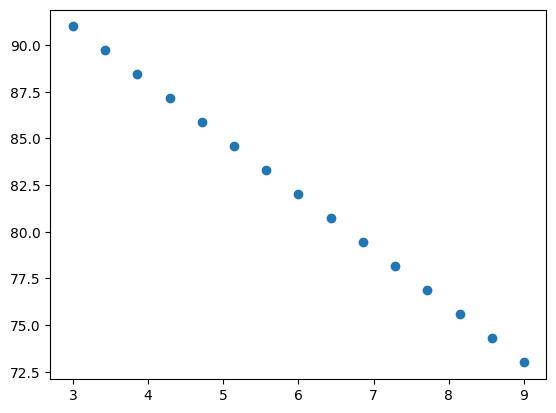

In [2]:
energy_arr = np.linspace(3,9,15)              
spectrum_arr = 100 - energy_arr * 3

plt.scatter(energy_arr, spectrum_arr)

The next line creates a file called `myspectrum.csv` and saves the content of the arrays into it.

By zipping the two arrays I'm simply writing them into the file as columns rather than lines, which makes the file easier to understand if you open it with a text editor.

In [3]:
np.savetxt("myspectrum.csv", list(zip(energy_arr, spectrum_arr)), fmt='%.3e', delimiter=',')

The next line reads the data from the file `myspectrum.csv` and loads it back into numpy arrays.

Setting `unpack=True` is a useful trick that allows me to save the two columns of the file separately into different numpy arrays, in this case called `specx` and `specy`.

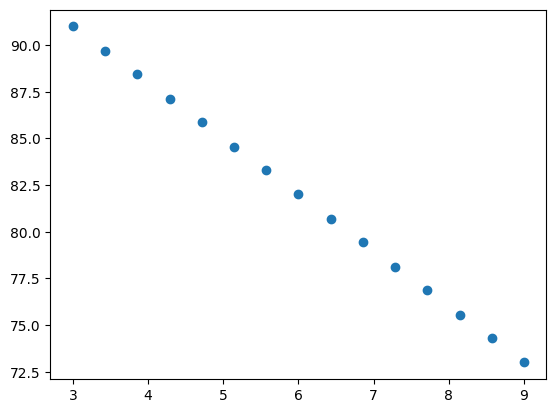

In [6]:
specx, specy = np.loadtxt("myspectrum.csv", delimiter=',', unpack=True)

plt.scatter(specx, specy)

# Random numbers with numpy

In [7]:
random_integers  = np.random.randint(400,500,15)
print(random_integers)

[402 430 426 420 404 420 497 468 463 426 434 453 424 461 403]


In [9]:
random_floats_1d = np.random.rand(15) # 1D array of random floating point 
                                      # numbers between 0 and 1.
                                      # Every time you re-run this cell,
                                      # you'll be creating a new set of 
                                      # pseudo-random numbers
print(random_floats_1d)

[0.31764319 0.55591185 0.3873221  0.7218119  0.02766172 0.87100161
 0.64682037 0.05519002 0.38316127 0.31320254 0.27872753 0.84965539
 0.3784198  0.49509454 0.17986349]


In [11]:
random_floats_2d = np.random.rand(3,6) # 2D array of random floating point 
                                       # numbers between 0 and 1
print(random_floats_2d)

[[0.25711306 0.99736988 0.33684344 0.90427614 0.47866252 0.33910838]
 [0.25688067 0.15372754 0.62399408 0.23751869 0.20980321 0.02739611]
 [0.24205607 0.74301527 0.91774693 0.11782878 0.25957178 0.00456629]]


### Seeding:

To make your experiment reproducible, you may want to *seed* the random numbers you produce:

In [18]:
np.random.seed(0) # This fixes the random numbers that are produced next

random_but_predictable = np.random.rand(3,3) # If you re-run this cell, these 
                                             # values won't change
print(random_but_predictable)

[[0.5488135  0.71518937 0.60276338]
 [0.54488318 0.4236548  0.64589411]
 [0.43758721 0.891773   0.96366276]]


### Group activity:  

Write a function that estimates the value of $\pi$ with a Monte Carlo approach:

- First, we want to create a random set of $n$ points dixtributed randomly inside a 2x2 square, so with x- and y- coordinates between 0 and 2.
- Then we count how many of these points lie inside a circle of radius 1 centered in the middle of the square.
- Because our points are randomly distributed, the ratio between the fraction of points that lie inside the circle gives you an estimate of the ratio between the area of the circle and the total area of the square:

$$
\frac{N_\rm{inside}}{N_\rm{total}} = \frac{A_\bigodot}{A_\square} = \frac{\pi}{4}
$$